In [1]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import nltk 
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
tweets = pd.read_csv(r'C:\Users\Alamzeb\Desktop\Tweets.csv')

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null float64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 1.7+ MB


6.0
4.0


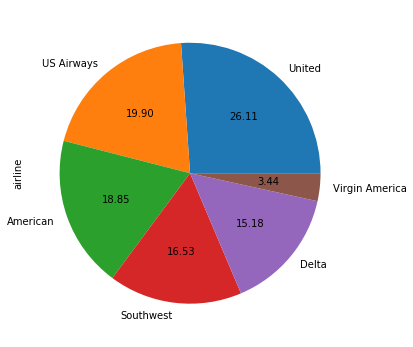

In [5]:
w = plt.rcParams["figure.figsize"] 
print(w[0]) 
print(w[1])

w[0] = 8
w[1] = 6
plt.rcParams["figure.figsize"] = w 

tweets.airline.value_counts().plot(kind='pie', autopct='%1.2f')

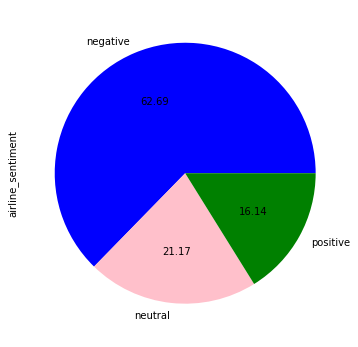

In [6]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.2f', colors=["blue", "pink", "green"])

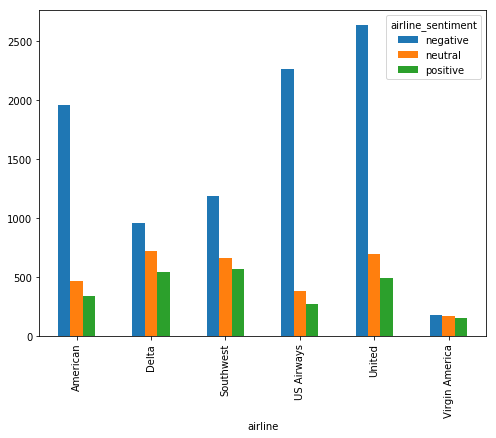

In [7]:
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

C:\Users\Alamzeb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


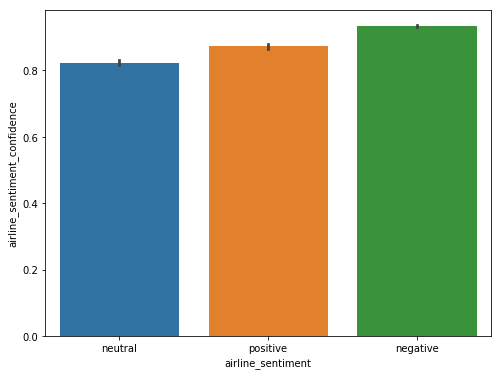

In [8]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=tweets)

In [9]:
features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

In [10]:
processed_features = []
for sentence in range(0, len(features)):
    
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

   
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

   
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

   
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [11]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)



In [13]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
predictions = text_classifier.predict(X_test)

In [15]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


In [16]:
clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Accuracy: 0.671448087431694
[[1440  307  123]
 [ 263  282   69]
 [ 121   79  244]]
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78      1870
     neutral       0.42      0.46      0.44       614
    positive       0.56      0.55      0.55       444

   micro avg       0.67      0.67      0.67      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.67      0.67      2928

0.671448087431694


In [18]:
classifier= MultinomialNB().fit(X_train, y_train)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Accuracy: 0.7581967213114754
[[1823   40    7]
 [ 388  204   22]
 [ 213   38  193]]
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      1870
     neutral       0.72      0.33      0.46       614
    positive       0.87      0.43      0.58       444

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.78      0.58      0.63      2928
weighted avg       0.76      0.76      0.73      2928

0.7581967213114754


In [21]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

C:\Users\Alamzeb\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6386612021857924
[[1870    0    0]
 [ 614    0    0]
 [ 444    0    0]]
              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      1870
     neutral       0.00      0.00      0.00       614
    positive       0.00      0.00      0.00       444

   micro avg       0.64      0.64      0.64      2928
   macro avg       0.21      0.33      0.26      2928
weighted avg       0.41      0.64      0.50      2928



C:\Users\Alamzeb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alamzeb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alamzeb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.601775956284153
[[1322  380  168]
 [ 309  247   58]
 [ 165   86  193]]
              precision    recall  f1-score   support

    negative       0.74      0.71      0.72      1870
     neutral       0.35      0.40      0.37       614
    positive       0.46      0.43      0.45       444

   micro avg       0.60      0.60      0.60      2928
   macro avg       0.51      0.51      0.51      2928
weighted avg       0.61      0.60      0.61      2928

